## Presprocesamiento de los datos

In [1]:
import os
import pandas as pd

In [2]:
# Cambiar directorio
os.chdir("..")

In [3]:
# Cargar los datos que tenemos disponibles
data = pd.read_csv("data/raw/churn.csv")


In [4]:
data.head(5)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [5]:
# Nos deshacemos de las columnas que no contribuyen en mucho
data = data.drop(data.columns[0:3], axis=1)

In [6]:
data.isna().sum()

CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [7]:
data.dtypes

CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

In [8]:
# Convertimos los datos en formato categorico, para más info: shorturl.at/y0269
column_equivalence = {}
features = list(data.columns)
# Iteramos sobre los tipos de datos de cada columna, convirtiéndolos a string para poder compararlos
for i, column in enumerate(list([str(d) for d in data.dtypes])):
    # Si la columna es de tipo 'object' (categoría o texto)
    if column == "object":
        data[data.columns[i]] = data[data.columns[i]].fillna(data[data.columns[i]].mode())     # Rellenamos valores nulos con el valor más frecuente (moda)
        categorical_column = data[data.columns[i]].astype("category")                          # Convertimos la columna a tipo 'category' (categoría de pandas)
        current_column_equivalence = dict(enumerate(categorical_column.cat.categories))        # Diccionario que asocia índices numéricos a cada categoría
        column_equivalence[i] = dict((v,k) for k,v in current_column_equivalence.items())      # Invertimos el diccionario
        data[data.columns[i]] = categorical_column.cat.codes                                   # Reemplazamos las categorías por sus códigos numéricos en la columna
    # Si la columna no es de tipo 'object' (numérica u otro)
    else:
        data[data.columns[i]] = data[data.columns[i]].fillna(data[data.columns[i]].median())   # Rellenamos valores nulos con la mediana de la columna

In [9]:
column_equivalence

{1: {'France': 0, 'Germany': 1, 'Spain': 2}, 2: {'Female': 0, 'Male': 1}}

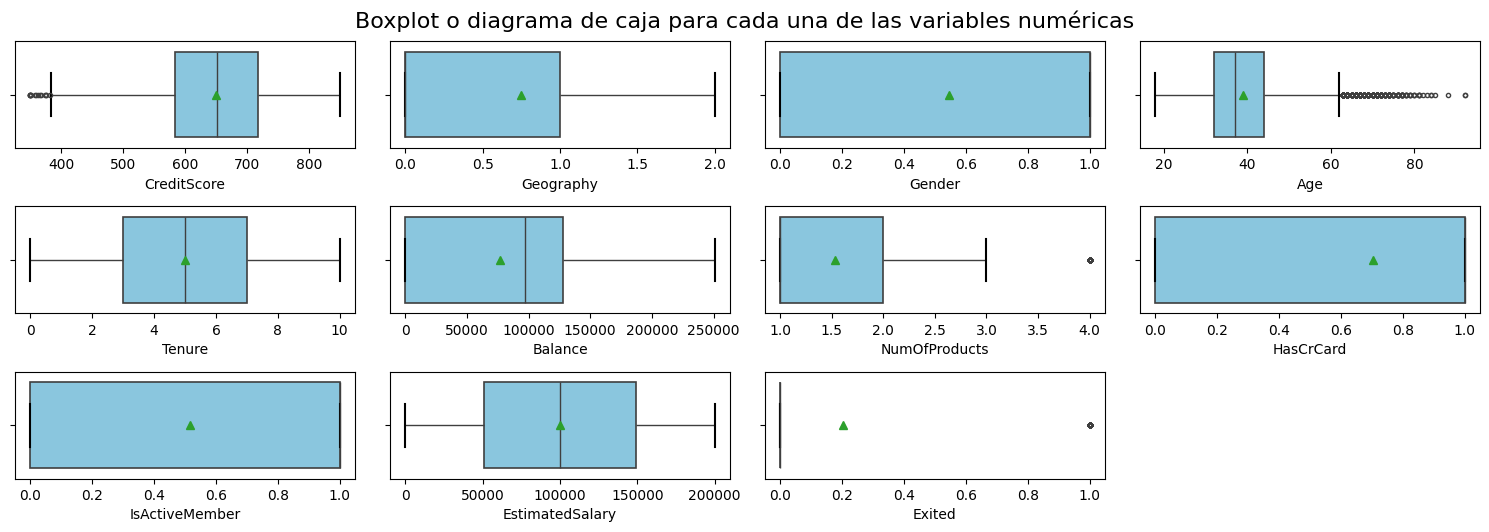

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

num_cols = data.select_dtypes(include=np.number)# Selecciona todas las columnas numéricas
num_rows = 6        # Número de filas de la cuadrícula de gráficos
num_cols_grid = 4   # Número de columnas de la cuadrícula de gráficos

fig, axes = plt.subplots(num_rows, num_cols_grid, figsize=(15, 10))

# Bucle para iterar sobre todas las columnas numéricas y crear un diagrama de caja (boxplot) para cada una
for i, colname in enumerate(num_cols.columns):
    # Calcula la posición (fila y columna) en la cuadrícula del gráfico actual
    row = i // num_cols_grid  # Fila correspondiente en la cuadrícula
    col = i % num_cols_grid   # Columna correspondiente en la cuadrícula
    
    # Crea el gráfico de boxplot para la columna 'colname' en la posición (row, col)
    ax = sns.boxplot(x=data[colname], showmeans=True, ax=axes[row, col], 
                     boxprops={"facecolor": "#8ac6de", "linewidth": 1.2},  # Color y grosor de las cajas
                     capprops={"color": "black", "linewidth": 1.5},        # Color y grosor de los bigotes
                     flierprops={"marker": "o", "markersize": 3})          # Marcador y tamaño de los valores atípicos

# Eliminando los ejes vacíos si hay menos columnas numéricas que las posiciones de la cuadrícula
for j in range(i+1, num_rows*num_cols_grid):
    row = j // num_cols_grid  # Calcula la fila del gráfico vacío
    col = j % num_cols_grid   # Calcula la columna del gráfico vacío
    fig.delaxes(axes[row, col])  # Elimina el gráfico vacío en la posición (row, col)

fig.suptitle('Boxplot o diagrama de caja para cada una de las variables numéricas', fontsize=16)
plt.tight_layout() # Ajusta la distribución de espacios vacios
plt.show()


Visualmente podemos identificar algunos valores atipicos, que tienen sentido y probablemente no se deben a errores en la información. Por lo que no hace falta alterarlos.

In [11]:
#Normalizando los datos aplicando un scaler 
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
data = pd.DataFrame(scaler.fit_transform(data), columns=data.columns)
data.sample(10)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
9355,0.778,1.0,0.0,0.297297,0.8,0.000000,0.000000,1.0,0.0,0.835174,0.0
4272,0.580,1.0,0.0,0.216216,0.3,0.310193,0.000000,1.0,1.0,0.842747,0.0
89,0.570,0.5,0.0,0.135135,0.3,0.325326,0.333333,1.0,1.0,0.783974,0.0
4424,0.502,0.5,0.0,0.391892,0.1,0.569163,0.000000,1.0,1.0,0.287735,0.0
4815,0.850,0.5,0.0,0.797297,0.6,0.538548,0.000000,1.0,0.0,0.189143,0.0
4500,0.842,0.5,1.0,0.189189,0.9,0.308839,0.000000,0.0,0.0,0.165673,0.0
5068,0.724,1.0,0.0,0.824324,0.5,0.430767,0.000000,1.0,1.0,0.870620,0.0
7282,0.462,1.0,0.0,0.351351,0.7,0.754562,0.333333,1.0,0.0,0.225095,1.0
185,0.328,0.0,1.0,0.189189,0.8,0.000000,0.333333,1.0,0.0,0.479274,0.0
7301,0.834,0.5,0.0,0.202703,0.1,0.576940,0.000000,1.0,1.0,0.662409,0.0


## Entrenamiento del modelo

In [12]:
# Vamos a crear un modelo de regresion logistica
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
seed=42

In [13]:
# Generar los datos para poder separar la variable de respuesta de los datos que tenemos disponibles
X = data.copy()
y = X.pop(data.columns[-1])

In [14]:
from imblearn.over_sampling import SMOTE

#Aplicamos balanceo de clases con SMOTE
oversample = SMOTE()
X, y = oversample.fit_resample(X, y)

In [15]:
# Separar los datos en datos de entrenamiento y testing
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.33, random_state=42)
# Crear el modelo base
svm = SVC(random_state=seed)

In [16]:
#Aproximandonos a los mejores hiperparametros con una busqueda aleatoria
from sklearn.model_selection import RandomizedSearchCV

# Definir el espacio de búsqueda de hiperparámetros
param_distribution = [ {'C':[1.0,2.0,5.0,10.0,25.0,100.0,500.0,1000.0], 'kernel':['linear'],'tol':[1e-2,1e-3,1e-4,1e-5]},
               {'C':[1.0,2.0,5.0,10.0,25.0,100.0,500.0,1000.0], 'kernel':['rbf'], 'gamma':[0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9],'tol':[1e-2,1e-3,1e-4,1e-5]},
               {'C':[1.0,2.0,5.0,10.0,25.0,100.0,500.0,1000.0], 'kernel':['poly'], 'degree': [2,3,4,5,6] ,'gamma':[0.01,0.02,0.03,0.04,0.05],'tol':[1e-2,1e-3,1e-4,1e-5]}]

#Usamos RandomizedSearchCV teniendo en cuenta que este módelo no explora todas las combinaciones sino solo las que se indiquen en n_iter de forma aleatoria
random_search = RandomizedSearchCV(estimator=svm,
                    param_distributions=param_distribution,
                    n_iter=50,
                    random_state=seed,
                    n_jobs=-1)

# Ejecutar la búsqueda aleatoria
random_search.fit(X_train, y_train)

RandomizedSearchCV(estimator=SVC(random_state=42), n_iter=50, n_jobs=-1,
                   param_distributions=[{'C': [1.0, 2.0, 5.0, 10.0, 25.0, 100.0,
                                               500.0, 1000.0],
                                         'kernel': ['linear'],
                                         'tol': [0.01, 0.001, 0.0001, 1e-05]},
                                        {'C': [1.0, 2.0, 5.0, 10.0, 25.0, 100.0,
                                               500.0, 1000.0],
                                         'gamma': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6,
                                                   0.7, 0.8, 0.9],
                                         'kernel': ['rbf'],
                                         'tol': [0.01, 0.001, 0.0001, 1e-05]},
                                        {'C': [1.0, 2.0, 5.0, 10.0, 25.0, 100.0,
                                               500.0, 1000.0],
                                         'degree': [2, 3, 4, 5, 6],
                                         'gamma': [0.01, 0.02, 0.03, 0.04,
                                                   0.05],
                                         'kernel': ['poly'],
                                         'tol': [0.01, 0.001, 0.0001, 1e-05]}],
                   random_state=42)

In [17]:
results = random_search.cv_results_

# Crear un DataFrame a partir de los resultados
results_df = pd.DataFrame(results)

# Filtrar y ordenar los mejores resultados
top_results = results_df[['params', 'mean_test_score']].sort_values(by='mean_test_score', ascending=False)

# Mostrar las 5 mejores combinaciones
print("Las 5 mejores combinaciones de hiperparámetros:")
for index, row in top_results.head(5).iterrows():
    print(f"Combinación {index + 1}: {row['params']}, Puntuación: {row['mean_test_score']:.3f}")

Las 5 mejores combinaciones de hiperparámetros:
Combinación 8: {'tol': 0.001, 'kernel': 'rbf', 'gamma': 0.5, 'C': 500.0}, Puntuación: 0.822
Combinación 1: {'tol': 1e-05, 'kernel': 'rbf', 'gamma': 0.8, 'C': 100.0}, Puntuación: 0.822
Combinación 10: {'tol': 0.01, 'kernel': 'rbf', 'gamma': 0.4, 'C': 1000.0}, Puntuación: 0.822
Combinación 9: {'tol': 0.01, 'kernel': 'rbf', 'gamma': 0.7, 'C': 5.0}, Puntuación: 0.796
Combinación 2: {'tol': 0.001, 'kernel': 'rbf', 'gamma': 0.9, 'C': 2.0}, Puntuación: 0.794


In [18]:
from sklearn.model_selection import GridSearchCV

# Definir el espacio de búsqueda de hiperparámetros alrededor de los mejores encontrados
param_grid = {'C':np.logspace(1, 3, 3),
              'kernel':['rbf'], 
              'gamma':np.linspace(0.6,0.9,7),
              'tol':np.logspace(-4, -2, 3)}

# Configurar la búsqueda en cuadrícula
grid_search = GridSearchCV(estimator=svm, param_grid=param_grid, cv=3, verbose=1, n_jobs=-1)

# Ejecutar la búsqueda en cuadrícula
grid_search.fit(X_train, y_train)

# Mostrar los mejores hiperparámetros encontrados
print(f"Mejores hiperparámetros: {grid_search.best_params_}")
print(f"Mejor puntuación: {grid_search.best_score_:.3f}")

Fitting 3 folds for each of 63 candidates, totalling 189 fits


Mejores hiperparámetros: {'C': 1000.0, 'gamma': 0.9, 'kernel': 'rbf', 'tol': 0.0001}
Mejor puntuación: 0.837


In [19]:
# Entrenar el modelo con los mejores hiperparametros
svm =  SVC(random_state=42, **grid_search.best_params_).fit(X_train, y_train)

## Evaluación del modelo

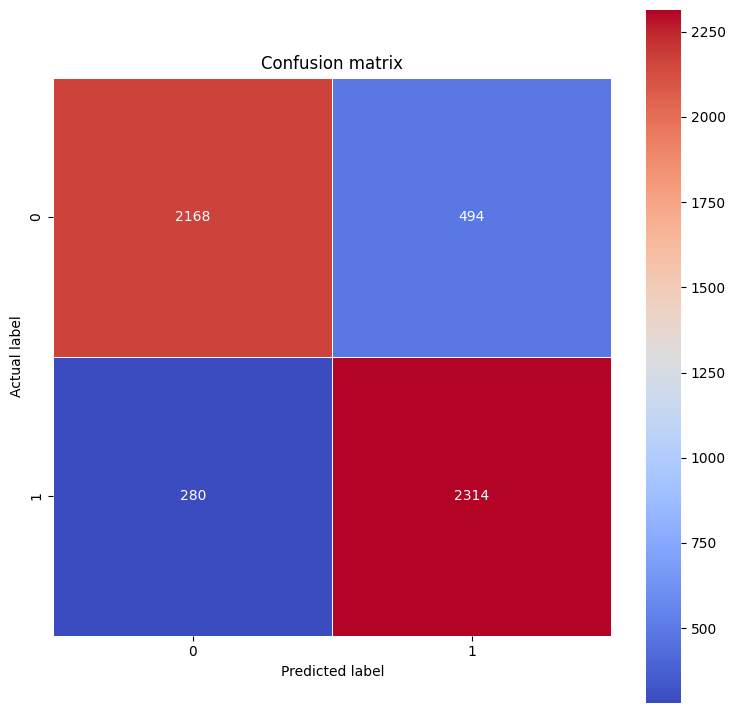

In [20]:
# Medir los resultados obtenidos usando una matriz de confusión
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, svm.predict(X_test))

#Visualizar la matriz de confusión
plt.figure(figsize=(9,9))
plt.title('Confusion matrix')
sns.heatmap(cm, annot=True, fmt='g', linewidths=.5, square=True, cmap='coolwarm')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show()

In [22]:
# Metricas de éxito propuestas para evaluar el modelo, en todas se busca un valor cercano a 1
from sklearn.metrics import accuracy_score, recall_score, f1_score

# Predecir resultados con los datos de prueba
prediction_test = svm.predict(X_test)

# Exactitud: proporción de predicciones correctas.
print(f"Accuracy model: {accuracy_score(y_test, prediction_test):.3f}")

# Sensibilidad: capacidad del modelo de identificar todas las muestras positivas para un label.
print(f"Exited Churn='NO': {recall_score(y_test, prediction_test, pos_label=0):.3f}")
print(f"Exited Churn='YES': {recall_score(y_test, prediction_test, pos_label=1):.3f}")

# F1 Score: media armónica entre precisión y sensibilidad, nos da una mejor idea de que tan bien se comporta el modelo de forma global.
print(f"F1 Score: {f1_score(y_test, prediction_test):.3f}")
# En ocasiones, esta última metrica se usa en competiciones (Kaggle, DataDriven) para comparar modelos.


Accuracy model: 0.853
Exited Churn='NO': 0.814
Exited Churn='YES': 0.892
F1 Score: 0.857


## Exportación con pickle

In [23]:
# Generar el binario del modelo para reutilizarlo, equivalencia de variables categoricas y caracteristicas del modelo
import pickle
#Tener en cuenta esta nota de la documentación de Python
#"Warning: The pickle module is not secure. Only unpickle data you trust."

pickle.dump(svm, open("models/model.pk", "wb"))
pickle.dump(column_equivalence, open("models/column_equivalence.pk", "wb"))
pickle.dump(features, open("models/features.pk", "wb"))